# Time Series Prediction: Air-Quality

In [41]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt


In [37]:
#%pwd + "/Data/AirQualityUCI.csv"

dfAirQ = pd.read_csv("AirQualityUCI.csv")
dfAirQ.head()


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  DummyX  DummyZ  
0  13.6  48.9  0.7578     NaN     NaN  
1  13.3  47.7  0.7255     NaN     NaN  
2  11.9  54.0  0.7502     NaN     NaN  
3  11.0  60.0  0.7867     NaN     NaN  
4  11.2  59.6  0.7888     NaN     NaN

In [39]:
dfAirQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null int64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null int64
NOx(GT)          9357 non-null int64
PT08.S3(NOx)     9357 non-null int64
NO2(GT)          9357 non-null int64
PT08.S4(NO2)     9357 non-null int64
PT08.S5(O3)      9357 non-null int64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
DummyX           0 non-null float64
DummyZ           0 non-null float64
dtypes: float64(7), int64(8), object(2)
memory usage: 1.2+ MB


In [43]:
dfAirQ = dfAirQ.drop(['DummyX', 'DummyZ'], axis=1)

In [44]:
dfAirQ.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [45]:
null_dfAirQ = dfAirQ[dfAirQ.isnull().any(axis=1)]
null_dfAirQ.head()

Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH]
Index: []

In [46]:
dfAirQ.shape

(9357, 15)

In [47]:
dfAirQ.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

In [48]:
dfAirQ = dfAirQ.replace(-200, np.nan)
dfAirQ.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.206794   398.484288   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%      98.000000    658.000000    78.000000   1227.000000   731.500000   
50%     180.000000    806.000000   109.000000   1463.000000   963.000000   
75%     326.000000    969.500000   142.000000   1674.000000  1273.500000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  8991.000000  8991.000000  8991.000000  
mean     18.317829    49.234201     1.025530  
std       8.832116    17.316892     0.403813  
min      -1.900000     9.200000     0.184700  
25%      11.800000    35.800000     0.736800  
50%      17.800000    49.600000     0.995400  
75%      24.400000    62.500000     1.313700  
max      44.600000    88.700000     2.231000

Count missing values again

In [49]:
dfAirQ.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [56]:
dfAirQ.index

RangeIndex(start=0, stop=9357, step=1)

In [57]:
dfAirQ.loc[:,'Datetime'] = dfAirQ['Date'] + ' ' + dfAirQ['Time']

In [66]:
from datetime import datetime
DateTime = []
for x in dfAirQ['Datetime']:
    DateTime.append(datetime.strptime(x,'%m/%d/%Y %H:%M:%S'))

Convert DateTime list to series, and use it as the index

In [67]:
datetime = pd.Series(DateTime)
dfAirQ.index = datetime

Check for duplicate values in the data

In [69]:
dfAirQ.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  \
2004-03-10 18:00:00  3/10/2004  18:00:00     2.6       1360.0     150.0   
2004-03-10 19:00:00  3/10/2004  19:00:00     2.0       1292.0     112.0   
2004-03-10 20:00:00  3/10/2004  20:00:00     2.2       1402.0      88.0   
2004-03-10 21:00:00  3/10/2004  21:00:00     2.2       1376.0      80.0   
2004-03-10 22:00:00  3/10/2004  22:00:00     1.6       1272.0      51.0   

                     C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
2004-03-10 18:00:00      11.9         1046.0    166.0        1056.0    113.0   
2004-03-10 19:00:00       9.4          955.0    103.0        1174.0     92.0   
2004-03-10 20:00:00       9.0          939.0    131.0        1140.0    114.0   
2004-03-10 21:00:00       9.2          948.0    172.0        1092.0    122.0   
2004-03-10 22:00:00       6.5          836.0    131.0        1205.0    116.0   

                     PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
2004-03-10 18:00:00        1692.0       1268.0  13.6  48.9  0.7578   
2004-03-10 19:00:00        1559.0        972.0  13.3  47.7  0.7255   
2004-03-10 20:00:00        1555.0       1074.0  11.9  54.0  0.7502   
2004-03-10 21:00:00        1584.0       1203.0  11.0  60.0  0.7867   
2004-03-10 22:00:00        1490.0       1110.0  11.2  59.6  0.7888   

                               Datetime  
2004-03-10 18:00:00  3/10/2004 18:00:00  
2004-03-10 19:00:00  3/10/2004 19:00:00  
2004-03-10 20:00:00  3/10/2004 20:00:00  
2004-03-10 21:00:00  3/10/2004 21:00:00  
2004-03-10 22:00:00  3/10/2004 22:00:00

Check the data type for each variable

In [74]:
dfAirQ.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Datetime          object
dtype: object

In [75]:
dfAirQ.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  7674.000000  8991.000000   914.000000  8991.000000    8991.000000   
mean      2.152750  1099.833166   218.811816    10.083105     939.153376   
std       1.453252   217.080037   204.459921     7.449820     266.831429   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.100000   937.000000    67.000000     4.400000     734.500000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.900000  1231.000000   297.000000    14.000000    1116.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7718.000000   8991.000000  7715.000000   8991.000000  8991.000000   
mean    246.896735    835.493605   113.091251   1456.264598  1022.906128   
std     212.979168    256.817320    48.370108    346.206794   398.484288   
min       2.000000    322.000000     2.000000    551.000000   221.000000   
25%      98.000000    658.000000    78.000000   1227.000000   731.500000   
50%     180.000000    806.000000   109.000000   1463.000000   963.000000   
75%     326.000000    969.500000   142.000000   1674.000000  1273.500000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  8991.000000  8991.000000  8991.000000  
mean     18.317829    49.234201     1.025530  
std       8.832116    17.316892     0.403813  
min      -1.900000     9.200000     0.184700  
25%      11.800000    35.800000     0.736800  
50%      17.800000    49.600000     0.995400  
75%      24.400000    62.500000     1.313700  
max      44.600000    88.700000     2.231000

Get the mean value for identified columns, and fill the missing values

In [77]:
S1 = dfAirQ['PT08.S1(CO)'].fillna(dfAirQ['PT08.S1(CO)'].mean())
S2 = dfAirQ['PT08.S2(NMHC)'].fillna(dfAirQ['PT08.S1(CO)'].mean())
S3 = dfAirQ['PT08.S3(NOx)'].fillna(dfAirQ['PT08.S1(CO)'].mean())
S4 = dfAirQ['PT08.S4(NO2)'].fillna(dfAirQ['PT08.S1(CO)'].mean())
S5 = dfAirQ['PT08.S5(O3)'].fillna(dfAirQ['PT08.S1(CO)'].mean())

Create a new procesed dataframe with all the mean values and save to csv for future use

In [78]:
dfMean = pd.DataFrame({'S1':S1, 'S2':S1, 'S3':S3, 'S4':S4, 'S5':S5})
dfMean.to_csv("AirQuality_processed.csv")

Text(0.5, 1.0, 'S5')

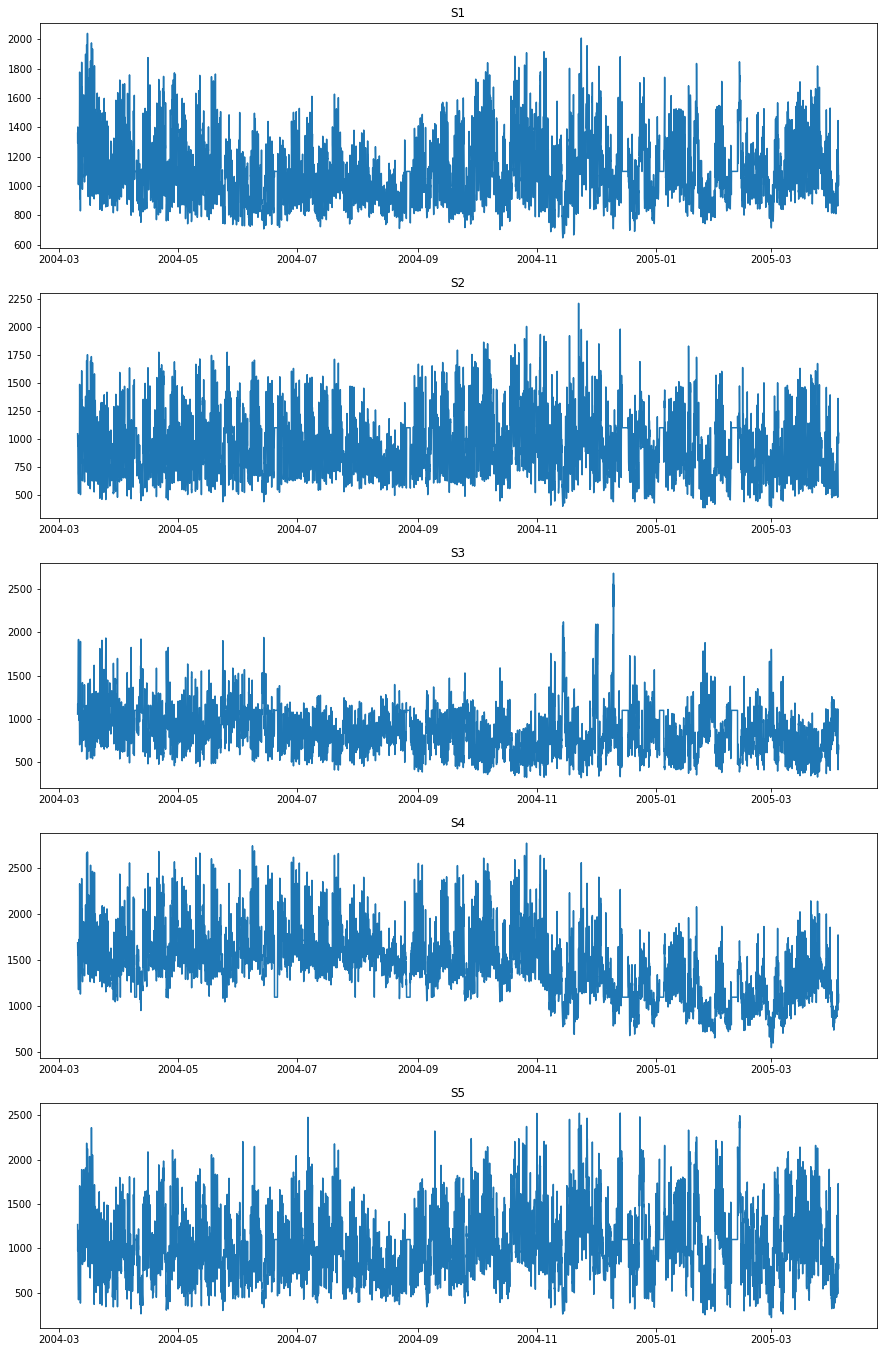

In [79]:
fig, axes = plt.subplots(5,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('S1')
axes[1].plot(S2)
axes[1].set_title ('S2')
axes[2].plot(S3)
axes[2].set_title ('S3')
axes[3].plot(S4)
axes[3].set_title ('S4')
axes[4].plot(S5)
axes[4].set_title ('S5')

Plots withn shorter period to understand the pattern

Text(0.5, 1.0, 'S5')

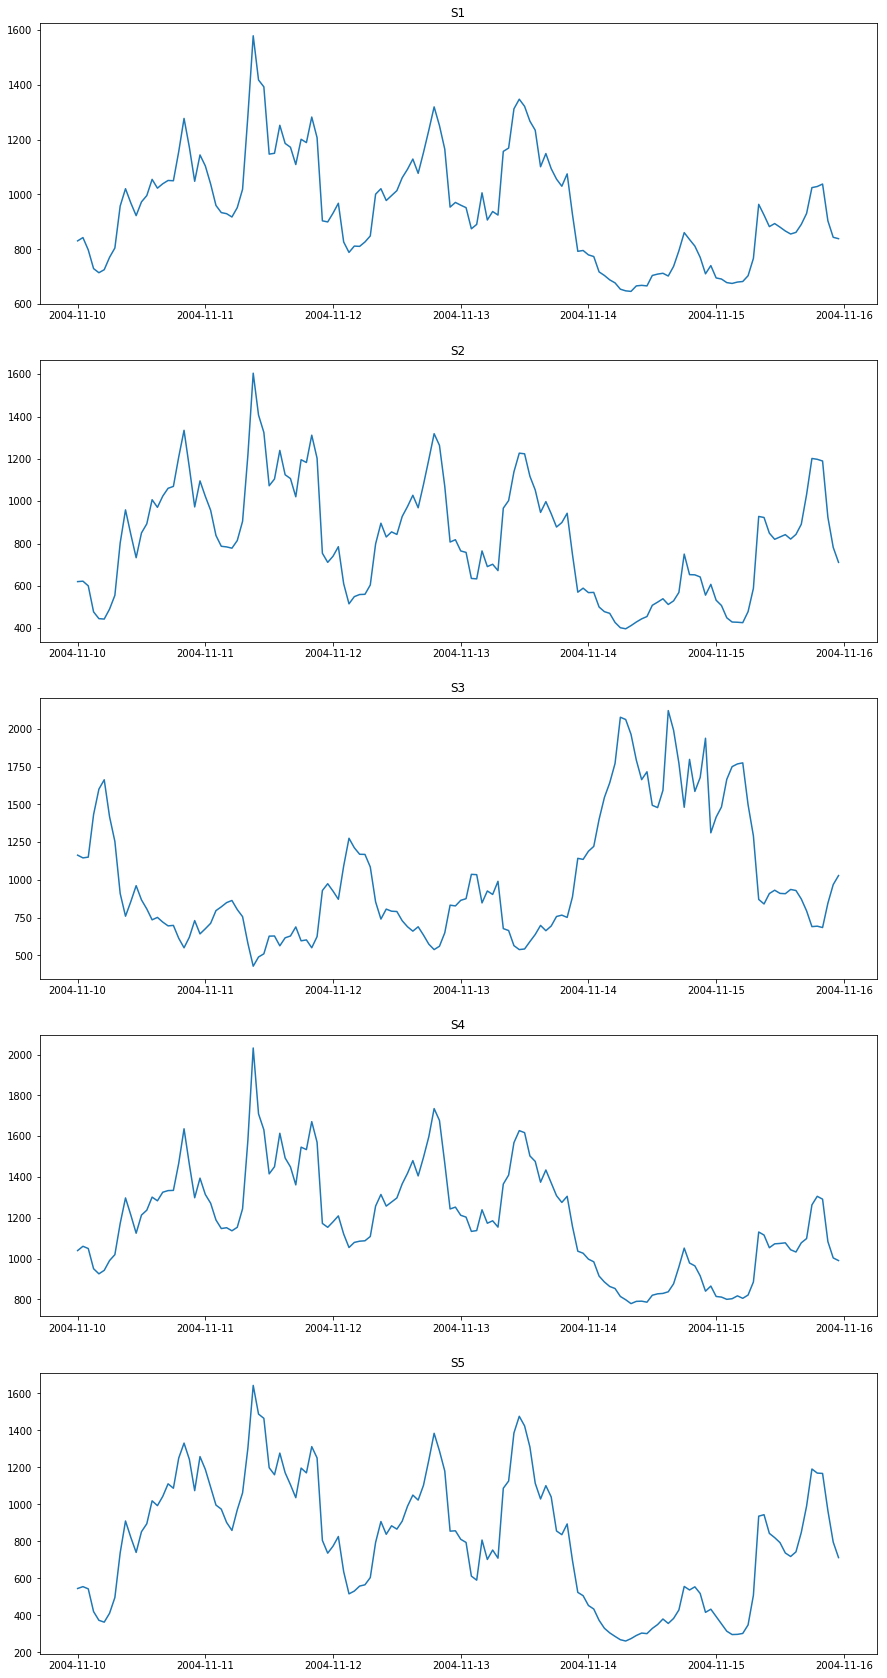

In [80]:
fig, axes = plt.subplots(5,1, figsize=(15,30))

axes[0].plot(S1['2004-11-10':'2004-11-15'])
axes[0].set_title ('S1')
axes[1].plot(S2['2004-11-10':'2004-11-15'])
axes[1].set_title ('S2')
axes[2].plot(S3['2004-11-10':'2004-11-15'])
axes[2].set_title ('S3')
axes[3].plot(S4['2004-11-10':'2004-11-15'])
axes[3].set_title ('S4')
axes[4].plot(S5['2004-11-10':'2004-11-15'])
axes[4].set_title ('S5')

Draw scatter plots of target variables